## Black-Box model  
- https://www.kaggle.com/code/sadikaljarif/dog-breed-identification

In [2]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dog-breed-identification/labels.csv')
train = "dog-breed-identification/train/"
test="dog-breed-identification/test/"

In [4]:
df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

C:\Users\evaqw\AppData\Local\Temp\ipykernel_17536\958596778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="breed",data=df,palette="Set1")


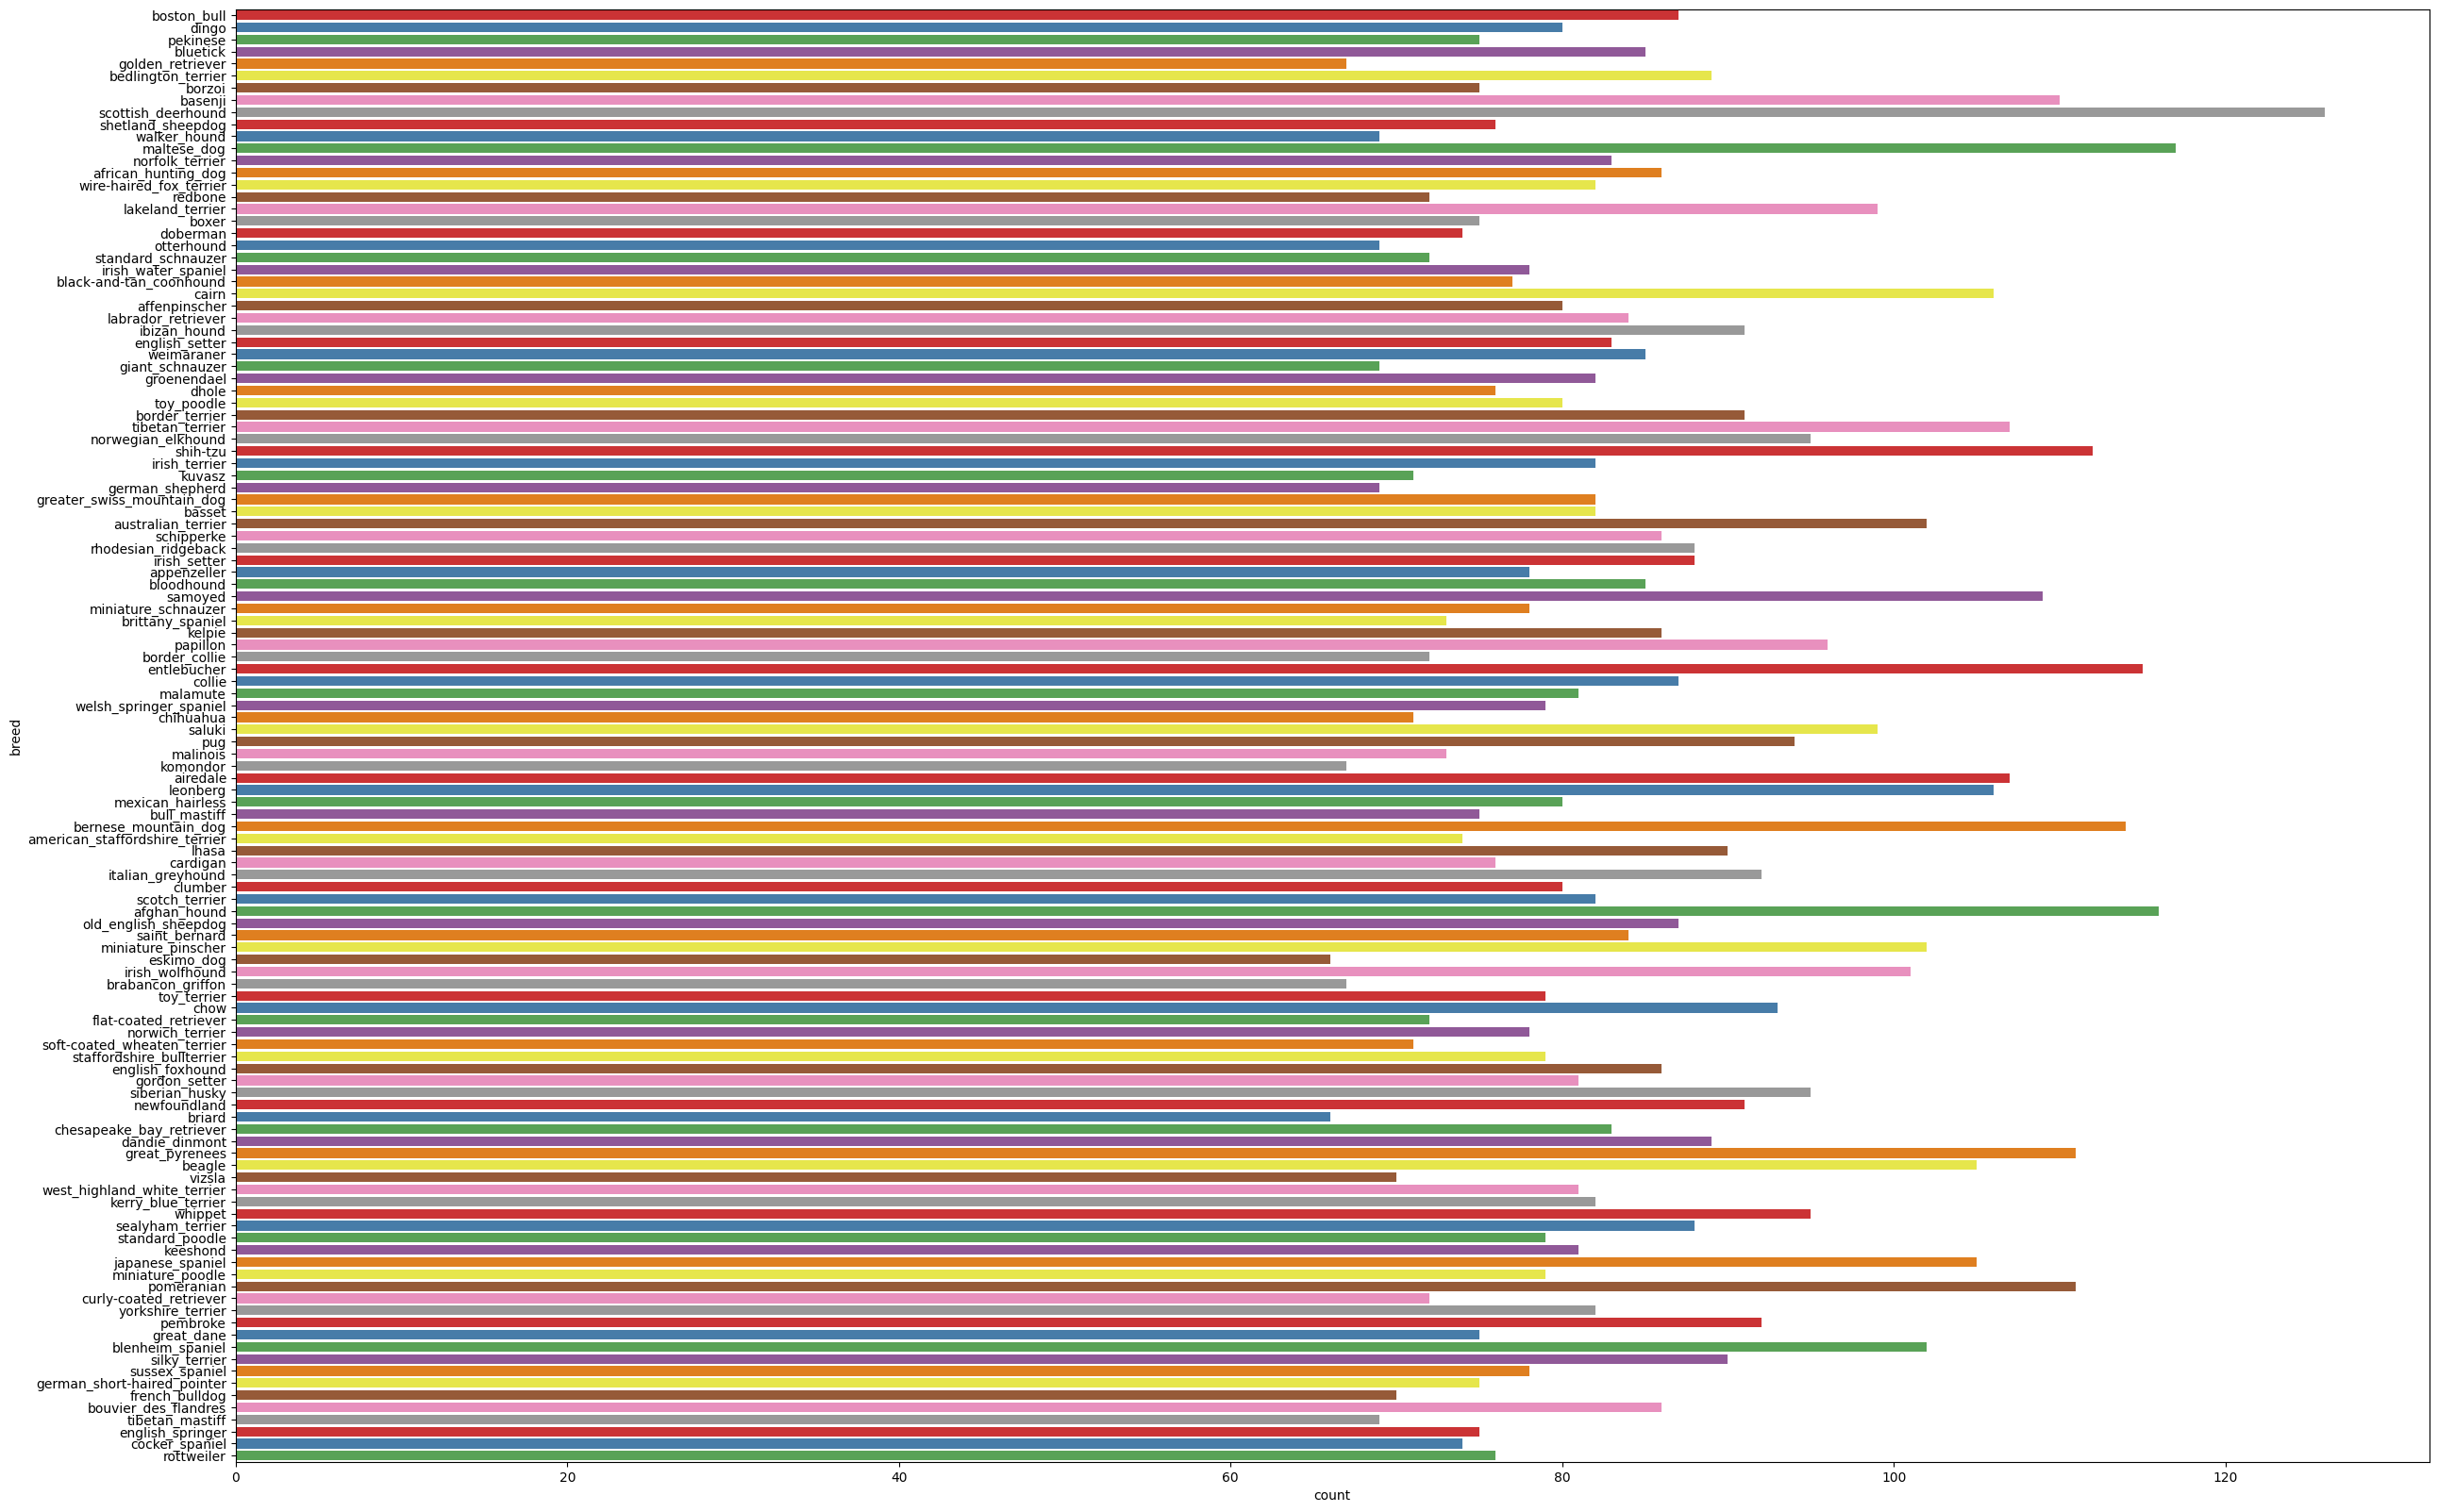

In [5]:
plt.figure(figsize=(30,20))
sns.countplot(y="breed",data=df,palette="Set1")
plt.show()

Visualize Train Data

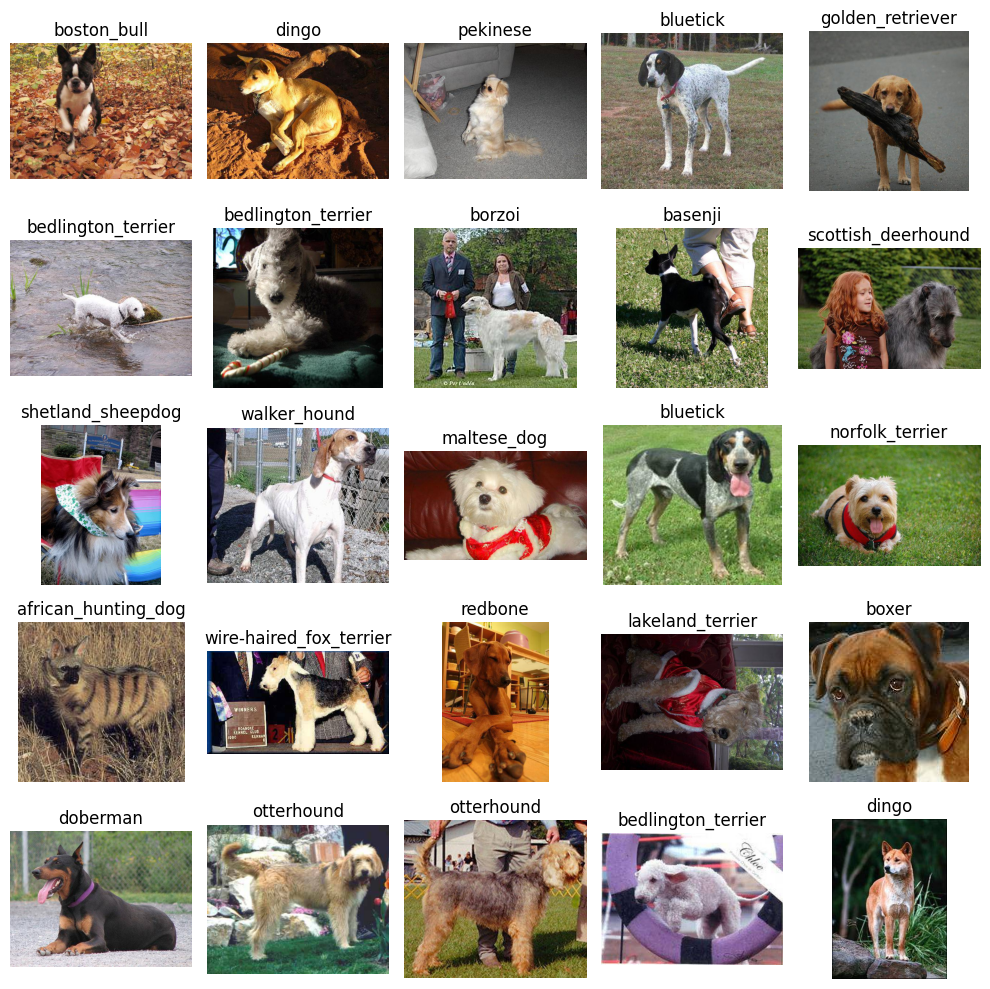

In [6]:
nrow=5
ncol=5
fig, ax=plt.subplots(nrow,ncol,figsize=(10,10))
for i, (img_id,breed) in enumerate(df[["id","breed"]].values[: nrow*ncol]):
    image_path=os.path.join(train, img_id+".jpg")
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    row=i//ncol
    col=i%ncol
    ax[row,col].imshow(image)
    ax[row,col].set_title(breed)
    ax[row,col].axis("off")
    
plt.tight_layout()
plt.show()

In [7]:
print("Total number of unique Dog Breeds :",len(df.breed.unique()))

Total number of unique Dog Breeds : 120


In [8]:
from sklearn.preprocessing import LabelEncoder
num_breed = 120
image_size = 200
batch_size = 32
encoder = LabelEncoder()

In [9]:
breed=list(df["breed"].value_counts().keys())
new=sorted(breed,reverse=True)[: num_breed]
df=df.query("breed in @new")
df

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [10]:
df['image_file'] = df['id'].apply(lambda x: x + ".jpg")
df.head()

id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                             image_file  
0  000bec180eb18c7604dcecc8fe0dba07.jpg  
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg  
2  001cdf01b096e06d78e9e5112d419397.jpg  
3  00214f311d5d2247d5dfe4fe24b2303d.jpg  
4  0021f9ceb3235effd7fcde7f7538ed62.jpg

## Load Pre-Trained ResNet-50 Model

First, import necessary libraries and load the ResNet-50 model pretrained on ImageNet. Exclude the top (fully connected) layer since you'll be adding your own for the classification task.

In [11]:
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input

In [12]:
train_data=np.zeros((len(df),image_size,image_size,3),dtype="float32")
for i,img_id in enumerate(df["image_file"]):
    img=cv2.resize(cv2.imread(train+img_id,cv2.IMREAD_COLOR), ((image_size,image_size)))
    img_array=preprocess_input(np.expand_dims(np.array(img[...,: : -1].astype(np.float32)).copy(),axis=0))
    train_data[i]=img_array
    

In [13]:
train_data[i]

array([[[ 0.45098042,  0.45098042,  0.4666667 ],
        [ 0.4666667 ,  0.4666667 ,  0.48235297],
        [ 0.5137255 ,  0.5137255 ,  0.52156866],
        ...,
        [-0.42745095, -0.44313723, -0.4352941 ],
        [-0.32549018, -0.32549018, -0.34117645],
        [-0.42745095, -0.42745095, -0.44313723]],

       [[ 0.41960788,  0.41960788,  0.43529415],
        [ 0.48235297,  0.48235297,  0.49803925],
        [ 0.45098042,  0.45098042,  0.4666667 ],
        ...,
        [-0.4823529 , -0.4980392 , -0.49019605],
        [-0.4980392 , -0.5058824 , -0.5058824 ],
        [-0.27843136, -0.27843136, -0.27843136]],

       [[ 0.5137255 ,  0.5137255 ,  0.5294118 ],
        [ 0.43529415,  0.43529415,  0.45882356],
        [ 0.3803922 ,  0.3803922 ,  0.39607847],
        ...,
        [-0.45098037, -0.4588235 , -0.4588235 ],
        [-0.08235294, -0.08235294, -0.08235294],
        [-0.5764706 , -0.5764706 , -0.5764706 ]],

       ...,

       [[ 0.5764706 ,  0.5764706 ,  0.5764706 ],
        [ 0

In [14]:
lab = df["breed"].unique().tolist()
print(lab)

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

In [15]:
label_data = encoder.fit_transform(df["breed"].values)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                   y_test, 
                                   batch_size=batch_size)

In [18]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

resnet = ResNet50V2(input_shape = [image_size, image_size, 3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(num_breed, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 102, 102, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [19]:
# history = model.fit(train_generator,steps_per_epoch= x_train.shape[0] // batch_size,epochs=10,
#                  validation_data= test_generator,
#                  validation_steps= x_test.shape[0] // batch_size)

In [182]:
import pickle

# model_bytes = pickle.dumps(model)

# # Save the bytes to a file
# with open("blackbox_model.pkl", "wb") as f:
#     f.write(model_bytes)

model = pickle.load(open('blackbox_model.pkl', 'rb'))

## LIME

This code will provide an explanation for the model's prediction on a randomly selected image from your test set. The explanation will highlight the areas of the image that were most influential in the model's decision, helping you understand why the model made its prediction.

Install LIME (if it's not installed yet)

In [ ]:
! pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/275.7 kB 1.3 MB/s eta 0:00:01
     -------- ---------------------------- 61.4/275.7 kB 656.4 kB/s eta 0:00:01
     ---------------- ------------------- 122.9/275.7 kB 901.1 kB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=3791545aff8d9b5ac4452d964511038159abb2b007ee77b9ffde725f461d11f6
  Stored in directory: c:\users\yasmine_bettaieb\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Prepare an Individual Image for Explanation:
Select an image from your test set and preprocess it in the same way you did for your training images

In [23]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import io
import contextlib
import sys

In [24]:
# Create a Lime Image Explainer
explainer = lime_image.LimeImageExplainer()

# Select a random image from your test set
test_image_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[test_image_index]

In [25]:
# Function to preprocess the image to be compatible with your model
def model_predict(image_list):
    processed_list = preprocess_input(np.array(image_list, dtype=np.float32))
    preds = model.predict(processed_list)
    return preds

# Function to suppress the output
@contextlib.contextmanager
def suppress_stdout():
    new_stdout = io.StringIO()
    old_stdout = sys.stdout
    try:
        sys.stdout = new_stdout
        yield
    finally:
        sys.stdout = old_stdout

In [26]:
# Use the function to suppress the output of explain_instance
with suppress_stdout():
    explanation = explainer.explain_instance(test_image, 
                                             model_predict, 
                                             top_labels=5, 
                                             hide_color=0, 
                                             num_samples=1000)


# Get image and mask
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, 
                                            num_features=5, 
                                            hide_rest=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

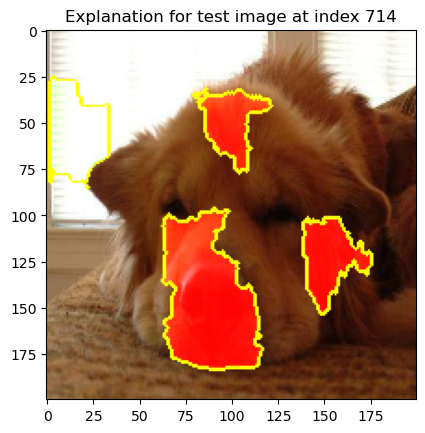

In [28]:
# Plot the image and the mask
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title("Explanation for test image at index {}".format(test_image_index))
plt.show()


### Interpretation of LIME Image Explanation

When interpreting this image, you can expect the following:

- **Green Areas**: The green areas represent parts of the image that positively contribute to the model's prediction. These regions might contain features that the model associates with a specific breed of dog.

- **Yellow Boundaries**: The yellow boundaries delineate the superpixels—segments of the image used by LIME to explain the prediction. LIME perturbs these superpixels and observes how the model's predictions change to determine their importance.

- **Non-highlighted Areas**: Any non-highlighted areas are parts of the image that did not significantly influence the model's prediction, or their influence was neutral.

In summary, this visualization is a way to understand which parts of the image are most influential in the model's decision-making process. For a practitioner, this can be used to gain insights into the model's behavior, potentially revealing whether the model is focusing on the correct features (like the shape of the ears, the color of the fur) or if it is being misled by irrelevant aspects (like the background or a particular accessory like a collar).


### Note:

- **Green Areas**: Typically, green areas would indicate features that positively influence the prediction of the class of interest. In the context of a dog breed classification model, green areas would highlight parts of the image that support the model's decision for the predicted breed.

- **Red Areas**: In some implementations, red might be used instead of green or to indicate a strong positive influence, potentially even more influential than areas highlighted in green. In other cases, red could indicate a negative influence, where the features contribute against the class of interest.

## Saliency map, SmoothGraph, Integrated Gradient, GradCAM 

In [26]:
!pip install saliency


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached saliency-0.2.0-py2.py3-none-any.whl (86 kB)
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
                                              0.0/24.5 MB ? eta -:--:--
    

In [56]:
import tensorflow as tf
import numpy as np
import PIL.Image
from matplotlib import pylab as P
import saliency.core as saliency

In [165]:
# Boilerplate methods.
def ShowImage(im, title='', ax=None):
    if ax is None:
        P.figure()
    P.axis('off')
    P.imshow(im)
    P.title(title)

def ShowGrayscaleImage(im, title='', ax=None):
    if ax is None:
        P.figure()
    P.axis('off')
    P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
    P.title(title)

def ShowHeatMap(im, title, ax=None):
    if ax is None:
        P.figure()
    P.axis('off')
    P.imshow(im, cmap='inferno')
    P.title(title)

def LoadImage(file_path):
    im = PIL.Image.open(file_path)
    im = im.resize((image_size, image_size))
    im = np.asarray(im)
    return im

def ShowImageMapOverlapping(image_path, map, title='', figsize=(5,5)):

    # # Two subplot
    # plt.figure(figsize=figsize)
    # plt.subplot(1,2,1)
    # plt.imshow(image)
    # plt.title("Original Image")
    # plt.subplot(1,2,2)
    # plt.imshow(map, cmap='hot')
    # plt.title(title)
    # plt.show()
        
    plt.figure(figsize=figsize)
    plt.imshow(tf.keras.preprocessing.image.load_img(image_path, target_size=(image_size, image_size)))
    plt.imshow(map, cmap='hot', alpha=0.8)
    plt.title(title)
    plt.show()

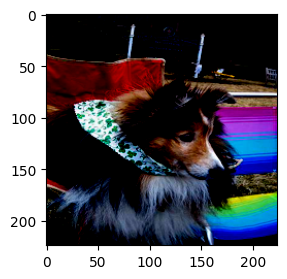

In [226]:
# Load an example image

# Should be actually 200
image_size = 224

# Choose image's index
img_ind = 10

img_id, breed = df[["id","breed"]].values[img_ind]
image_path = os.path.join(train, img_id+".jpg")
image = LoadImage(image_path)
image = preprocess_input(image)

plt.figure(figsize=(3,3))
plt.imshow(image)
plt.show()


In [140]:
# Make predictions
predictions = model.predict(np.array([image]))
prediction_class = np.argmax(predictions)
class_idx_str = 'class_idx_str'
call_model_args = {class_idx_str: prediction_class}

1/1 [==============================] - 12s 12s/step


In [144]:
# Create a call_model_function for ResNet50V2
def call_model_function(images, call_model_args=None, expected_keys=None):

    target_class_idx = call_model_args[class_idx_str]
    images = tf.convert_to_tensor(images)
    
    with tf.GradientTape() as tape:

        if expected_keys == [saliency.base.INPUT_OUTPUT_GRADIENTS]:
            tape.watch(images)
            output_layer = model(images)
            output_layer = output_layer[:, target_class_idx]
            gradients = np.array(tape.gradient(output_layer, images))
            return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}
        
        else:
            conv_layer, output_layer = model(images)
            gradients = np.array(tape.gradient(output_layer, conv_layer))
            return {saliency.base.CONVOLUTION_LAYER_VALUES: conv_layer,
                    saliency.base.CONVOLUTION_OUTPUT_GRADIENTS: gradients}


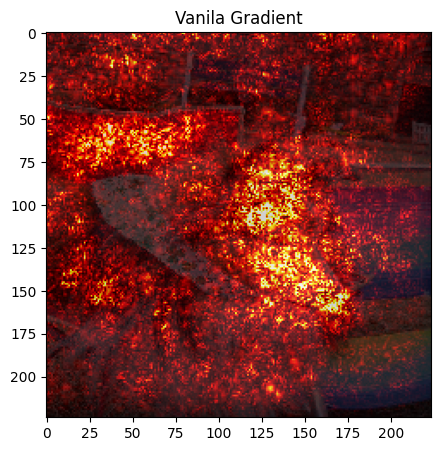

In [166]:
# Create a gradient_saliency instance
gradient_saliency = saliency.GradientSaliency()

# Compute the vanilla mask and the smoothed mask
vanilla_mask_3d = gradient_saliency.GetMask(image, call_model_function, call_model_args)
vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_mask_3d)

ShowImageMapOverlapping(image_path, vanilla_mask_grayscale, title='Vanila Gradient')


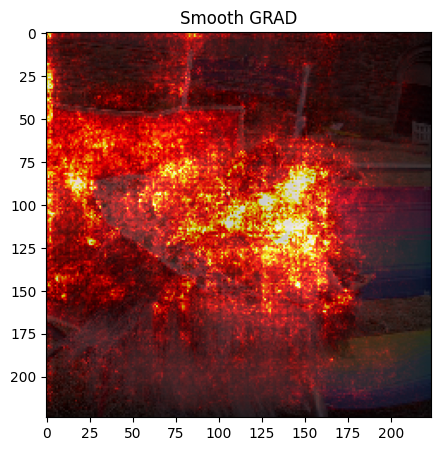

In [168]:
gradient_saliency = saliency.GradientSaliency()
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(image, call_model_function, call_model_args)
smooth_grad_cam_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ShowImageMapOverlapping(image_path, smooth_grad_cam_mask_grayscale, title='Smooth GRAD')


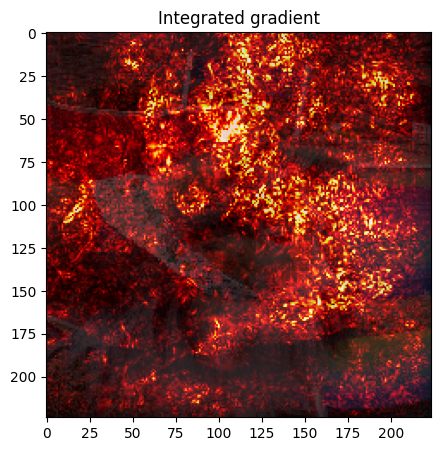

In [169]:
integrated_gradients = saliency.IntegratedGradients()

Integrated_gradient_grayscale_mask_3d = integrated_gradients.GetMask(image, call_model_function, call_model_args)
Integrated_gradient_grayscale = saliency.VisualizeImageGrayscale(Integrated_gradient_grayscale_mask_3d)

ShowImageMapOverlapping(image_path, Integrated_gradient_grayscale, title='Integrated gradient')


In [259]:
existing_layers = ['conv5_block1_1_conv', 'conv5_block1_1_bn', 'conv5_block1_1_relu', 'conv5_block1_2_conv',
                    'conv5_block1_2_bn', 'conv5_block1_2_relu', 'conv5_block1_0_conv', 'conv5_block1_3_conv', 
                    'conv5_block1_0_bn', 'conv5_block1_3_bn', 'conv5_block1_add', 'conv5_block1_out', 
                    'conv5_block2_1_conv', 'conv5_block2_1_bn', 'conv5_block2_1_relu', 'conv5_block2_2_conv',
                      'conv5_block2_2_bn', 'conv5_block2_2_relu', 'conv5_block2_3_conv', 'conv5_block2_3_bn',
                        'conv5_block2_add', 'conv5_block2_out', 'conv5_block3_1_conv', 'conv5_block3_1_bn', 
                        'conv5_block3_1_relu', 'conv5_block3_2_conv', 'conv5_block3_2_bn', 'conv5_block3_2_relu',
                          'conv5_block3_3_conv', 'conv5_block3_3_bn', 'conv5_block3_add', 'conv5_block3_out', 
                          'avg_pool', 'predictions']

gradcam_grad = saliency.GradCam()

m = pickle.load(open('blackbox_model.pkl', 'rb'))

last_layer = 'conv5_block3_3_conv'
conv_layer = m.get_layer(last_layer)
model = tf.keras.models.Model([m.inputs], [conv_layer.output, m.output])

In [260]:
def preprocessing_image(image_path="dog.jpg"):

    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    # image = tf.keras.applications.resnet50.preprocess_input(image)
    image = tf.keras.applications.mobilenet.preprocess_input(image)
    image = tf.expand_dims(image, axis=0)

    return image

image_expanded = preprocessing_image(image_path)
image_expanded.shape

TensorShape([1, 224, 224, 3])

c:\Users\evaqw\AppData\Local\Programs\Python\Python311\Lib\site-packages\saliency\core\visualization.py:28: RuntimeWarning: invalid value encountered in divide
  return np.clip((image_2d - vmin) / (vmax - vmin), 0, 1)


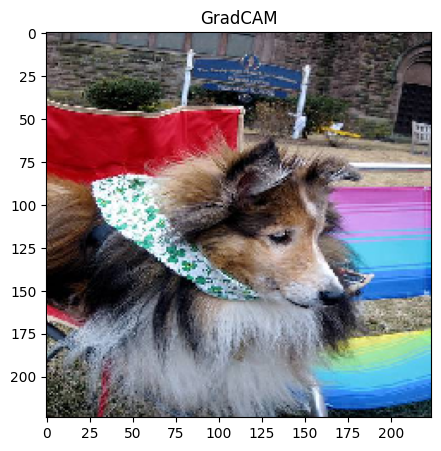

In [261]:
gradcam_grad_map = gradcam_grad.GetMask(image_expanded[0], call_model_function, call_model_args)
gradcam_grad_map_grayscale1 = saliency.VisualizeImageGrayscale(gradcam_grad_map)

ShowImageMapOverlapping(image_path, gradcam_grad_map_grayscale1, title='GradCAM')